In [131]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [77]:
df = pd.read_csv('natgas.csv')
df

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


<AxesSubplot:xlabel='Dates'>

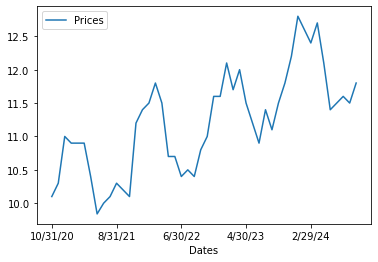

In [78]:
df.plot(x="Dates", y="Prices")

In [79]:
##Convert Date to int
y = []
d = []
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df = df.drop('Dates', axis=1)
df

,Prices,Year,Month
0,10.10,2020,10
1,10.30,2020,11
2,11.00,2020,12
3,10.90,2021,1
4,10.90,2021,2
5,10.90,2021,3
6,10.40,2021,4
7,9.84,2021,5
8,10.00,2021,6
9,10.10,2021,7


In [123]:
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(df.values)
data.shape
x = np.array(df[df.columns[1:]])
y = np.array(df['Prices'])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

In [126]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

mean_absolute_percentage_error(Y_test, Y_pred)

0.024826971513248752

In [128]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.05469739732307955


In [129]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.05196526403414767


In [132]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
preds = cb_model.predict(X_test)
 
cb_r2_score=r2_score(Y_test, preds)
cb_r2_score

Learning rate set to 0.024214
0:	learn: 0.7545949	total: 339us	remaining: 339ms
1:	learn: 0.7517369	total: 657us	remaining: 328ms
2:	learn: 0.7492395	total: 925us	remaining: 308ms
3:	learn: 0.7483635	total: 1.09ms	remaining: 271ms
4:	learn: 0.7447991	total: 1.32ms	remaining: 263ms
5:	learn: 0.7441641	total: 1.48ms	remaining: 245ms
6:	learn: 0.7397101	total: 1.74ms	remaining: 246ms
7:	learn: 0.7359733	total: 1.97ms	remaining: 244ms
8:	learn: 0.7318040	total: 2.23ms	remaining: 245ms
9:	learn: 0.7271972	total: 2.49ms	remaining: 246ms
10:	learn: 0.7237591	total: 2.75ms	remaining: 247ms
11:	learn: 0.7207445	total: 2.91ms	remaining: 240ms
12:	learn: 0.7186738	total: 3.17ms	remaining: 241ms
13:	learn: 0.7171024	total: 3.35ms	remaining: 236ms
14:	learn: 0.7151580	total: 3.6ms	remaining: 236ms
15:	learn: 0.7122675	total: 3.85ms	remaining: 237ms
16:	learn: 0.7091346	total: 4.11ms	remaining: 237ms
17:	learn: 0.7074883	total: 4.32ms	remaining: 236ms
18:	learn: 0.7047860	total: 4.61ms	remaining: 23

607:	learn: 0.1529836	total: 160ms	remaining: 103ms
608:	learn: 0.1525883	total: 160ms	remaining: 103ms
609:	learn: 0.1523946	total: 161ms	remaining: 103ms
610:	learn: 0.1520997	total: 161ms	remaining: 103ms
611:	learn: 0.1517073	total: 161ms	remaining: 102ms
612:	learn: 0.1515159	total: 162ms	remaining: 102ms
613:	learn: 0.1511275	total: 162ms	remaining: 102ms
614:	learn: 0.1509642	total: 162ms	remaining: 102ms
615:	learn: 0.1506958	total: 163ms	remaining: 101ms
616:	learn: 0.1504045	total: 163ms	remaining: 101ms
617:	learn: 0.1501414	total: 163ms	remaining: 101ms
618:	learn: 0.1497257	total: 164ms	remaining: 101ms
619:	learn: 0.1493145	total: 164ms	remaining: 100ms
620:	learn: 0.1490070	total: 164ms	remaining: 100ms
621:	learn: 0.1487051	total: 164ms	remaining: 100ms
622:	learn: 0.1485474	total: 165ms	remaining: 99.7ms
623:	learn: 0.1483926	total: 165ms	remaining: 99.5ms
624:	learn: 0.1481044	total: 165ms	remaining: 99.2ms
625:	learn: 0.1479191	total: 166ms	remaining: 99ms
626:	learn

-0.6520086272139991